<img src="heart.png" style="margin:0 auto">

<h4 style="text-align:center">source of data : https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset</h4>

<h3 style="color:red">1.Importer les bibliothèques<h3>

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from tkinter import *
from PIL import Image, ImageTk
import joblib
import matplotlib.pyplot as plt

<h3 style="color:red">2.Importer les données<h3>

In [2]:
data=pd.read_csv('heart.csv')

data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


<h3 style="color:red">3.les données manquantes<h3>

In [3]:
data.isnull().sum() #non manquantes data

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<h3 style="color:red">4.Les données dubliquées<h3>

In [4]:
data_dup=data.duplicated().any()
data_dup

True

In [5]:
data=data.drop_duplicates()

In [6]:
data_dup=data.duplicated().any()
data_dup

False

In [7]:
#the nembre of people that have Heart Disese
data.loc[data['target']==1].shape

(164, 14)

In [8]:
#those who not
data.loc[data['target']==0].shape

(138, 14)

In [9]:
data['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

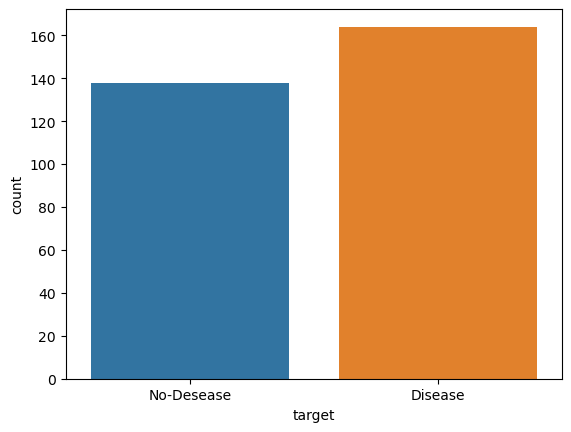

In [10]:
sns.countplot(x='target',data=data)
plt.xticks([0,1],['No-Desease','Disease'])
plt.show()

<Axes: >

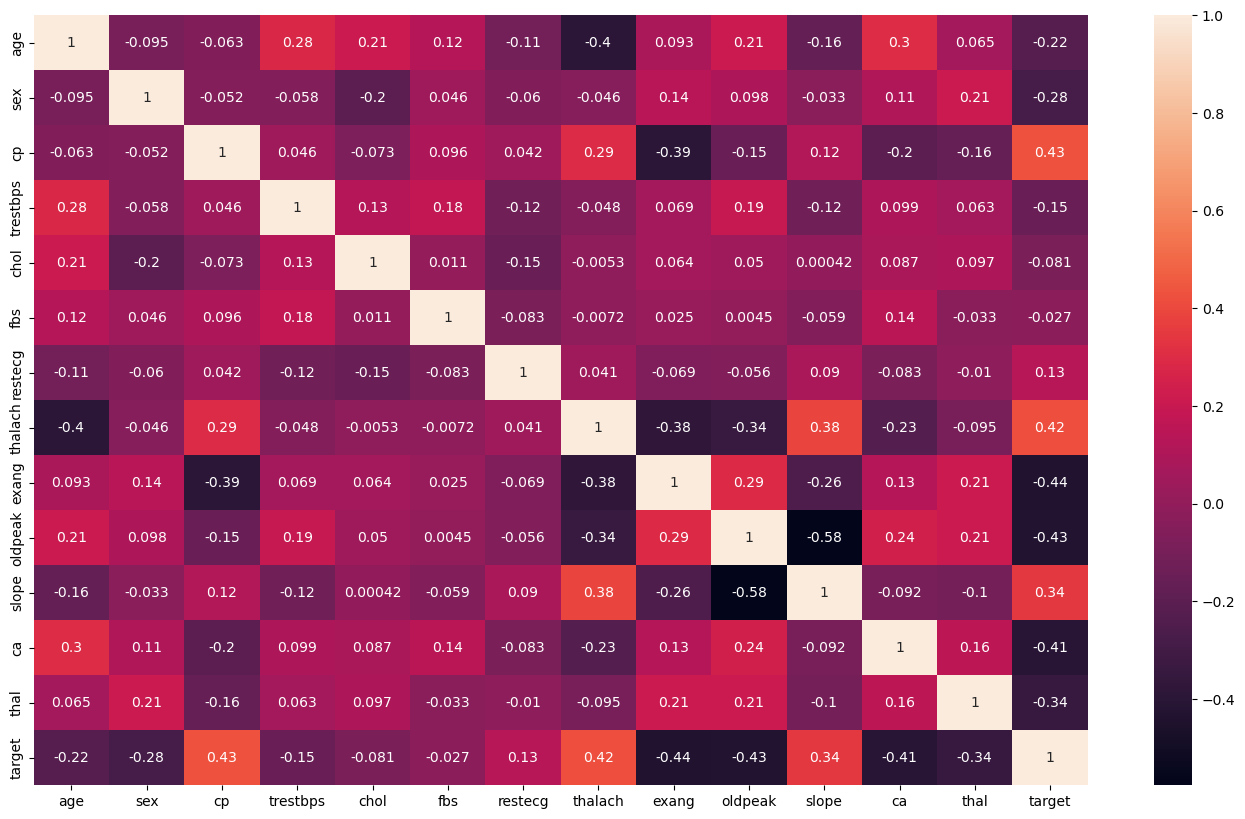

In [11]:
#correlation matrix
plt.figure(figsize=(17,10))
sns.heatmap(data.corr(),annot=True)

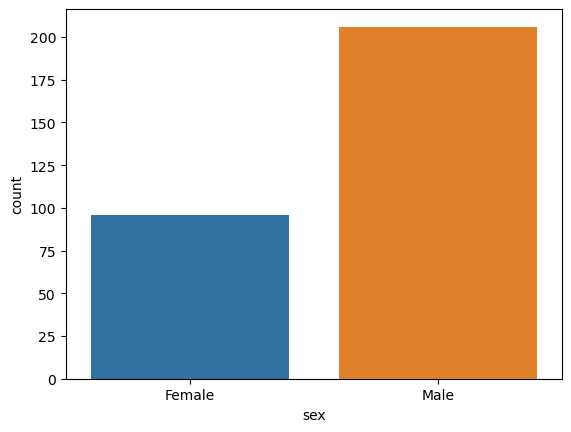

In [12]:
sns.countplot(x='sex',data=data)
plt.xticks([0,1],['Female','Male'])
plt.show()

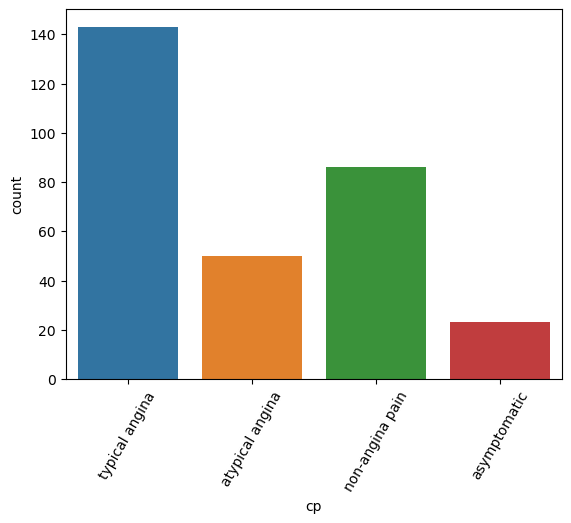

In [13]:
#check Cheast Pain Type
sns.countplot(x='cp',data=data)
plt.xticks([0,1,2,3],["typical angina","atypical angina","non-angina pain","asymptomatic"])
plt.xticks(rotation=60)
plt.show()
# like we can see typical angina is more coment between people

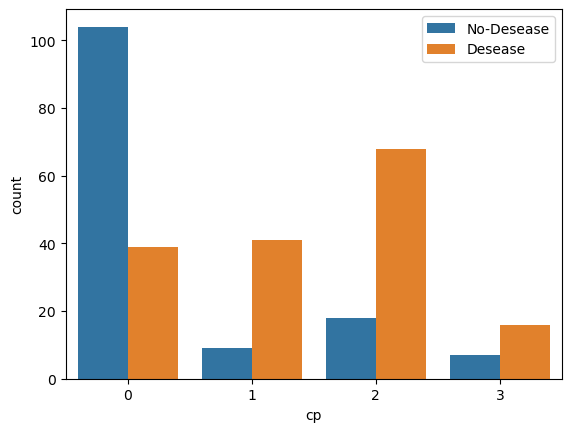

In [14]:
# the chest Pain Distribution as Per Terget Variable
sns.countplot(x='cp',hue='target',data=data)
plt.legend(labels=['No-Desease','Desease'])
plt.show()

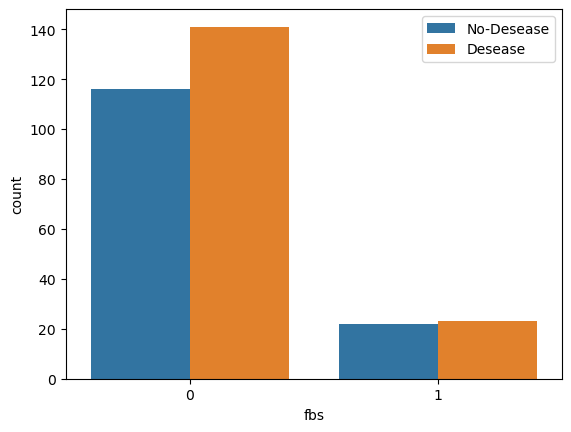

In [15]:
# the Fasting Blood Distribution according to Target Variable
sns.countplot(x='fbs',hue='target',data=data)
plt.legend(labels=['No-Desease','Desease'])
plt.show()

<Axes: >

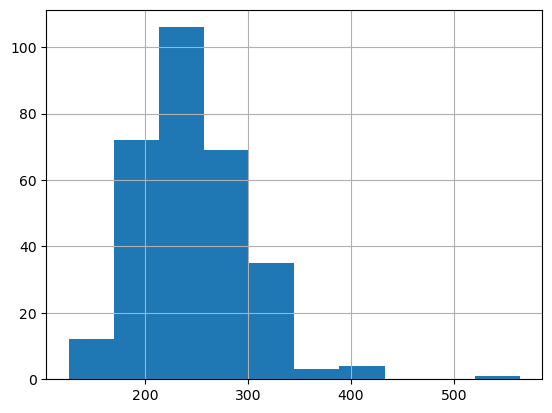

In [16]:
#destribution of Serum cholesterol
data['chol'].hist()

<h3 style="color:red">5.Data Processing<h3>

In [17]:
#separer les colonne categorique et numerique
cate_val=[]
cont_val=[] #numerique

for column in data.columns:
    if data[column].nunique()<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)
        

In [18]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [19]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

<h3 style="color:red">6.Encoding Categorical Data<h3>

In [20]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [21]:
data['cp'].unique()

array([0, 1, 2, 3])

In [22]:
cate_val.remove('sex')
cate_val.remove('target')
data=pd.get_dummies(data,columns=cate_val,drop_first=True)
data =data.replace({True:1,False:0})
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


<h3 style="color:red">7.Feature Scaling<h3>

In [23]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [24]:
st=StandardScaler()
data[cont_val]=st.fit_transform(data[cont_val])

In [25]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


<h3 style="color:red">8.Training and test set<h3>

In [26]:
X=data.drop('target',axis=1)#independant var

In [27]:
y=data['target']#depandant

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
X_test

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
245,-1.153610,1,-0.091401,-0.532247,1.680713,-0.899544,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
349,0.839089,0,-0.091401,0.319348,-2.299069,0.135360,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
135,0.396267,0,2.189843,-0.416120,-0.156110,1.515232,0,0,0,1,...,1,1,0,0,1,0,0,1,0,0
389,0.949794,1,0.764066,-0.261285,0.018826,1.084022,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
66,-0.157260,1,-0.091401,-0.958045,0.106294,0.135360,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,1.724733,1,1.391408,-0.029032,-0.287311,-0.899544,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
123,1.171205,0,0.478910,3.299932,0.324963,-0.209608,0,1,0,1,...,0,0,1,1,0,0,0,0,1,0
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
274,1.281911,1,1.619532,-0.358057,-0.505981,1.084022,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


<h3 style="color:red">9.Logistic regression<h3>

In [31]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [32]:
from sklearn.linear_model import LogisticRegression 

In [33]:
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [34]:
y_pred1=log.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
acc1=accuracy_score(y_test,y_pred1)
acc1

0.7868852459016393

<h3 style="color:red">Non-Linear ML Algorithms<h3>

In [37]:
df=pd.read_csv('heart.csv')

df=df.drop_duplicates()

X=df.drop('target',axis=1)

y=df['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

<h3 style="color:red">13. Random Forest Classifier<h3>

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf=RandomForestClassifier()

In [40]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [41]:
y_pred5=rf.predict(X_test)

In [42]:
acc2=accuracy_score(y_test,y_pred5)
acc2

0.8524590163934426

<h3 style="color:red">Comparaison en les Modéles<h3>

In [43]:
final_data=pd.DataFrame({
    'Models':['LR','RF'],
    'Accuracy':[acc1,acc2]
})

In [44]:
final_data

,Models,Accuracy
0,LR,0.786885
1,RF,0.852459


<Axes: xlabel='Models', ylabel='Accuracy'>

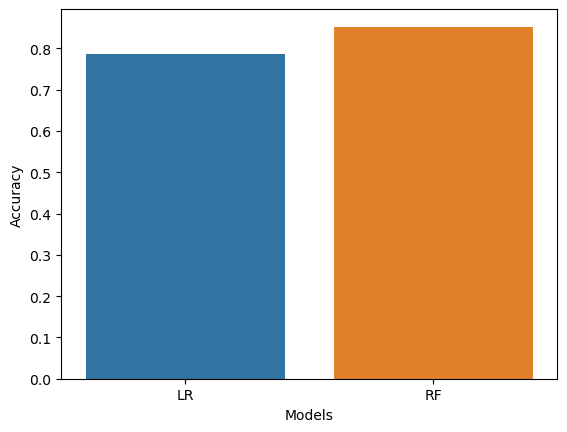

In [45]:
sns.barplot(x='Models', y='Accuracy', data=final_data)

<h3 style="color:red">Training RF<h3>

In [46]:
X=df.drop('target',axis=1)

y=df['target']

In [47]:
X.shape

(302, 13)

In [48]:
rf=RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

<h3 style="color:red">Save Model<h3>

In [49]:
import joblib

In [50]:
joblib.dump(rf,'model_maladies_cardiaques')

['model_maladies_cardiaques']

<h3 style="color:red">Interface graphique user<h3>

In [ ]:
from tkinter import *
from PIL import Image, ImageTk
import joblib
from tkinter import messagebox
def predict_heart_disease():
    # Récupérer les valeurs saisies par l'utilisateur à partir du dictionnaire `entries`
    age = int(entries["Âge:"].get())
    sex = int(entries["Sexe (1 pour Homme, 0 pour Femme):"].get())
    cp = int(entries["Type de douleur thoracique (CP):"].get())
    trestbps = int(entries["Tension artérielle au repos (TRESTBPS):"].get())
    chol = int(entries["Cholestérol sérique (CHOL):"].get())
    fbs = int(entries["Sucre dans le sang à jeun (FBS):"].get())
    restecg = int(entries["Résultats électrocardiographiques au repos (RESTECG):"].get())
    thalach = int(entries["Fréquence cardiaque maximale atteinte (THALACH):"].get())
    exang = int(entries["Angine provoquée par l'exercice (EXANG):"].get())
    oldpeak = float(entries["Dépression ST induite par l'exercice par rapport au repos (OLDPEAK):"].get())
    slope = int(entries["Pente du segment ST de l'exercice maximal (SLOPE):"].get())
    ca = int(entries["Nombre de vaisseaux principaux (CA):"].get())
    thal = int(entries["Résultat d'analyse nucléaire (THAL):"].get())

    # Charger le modèle de prédiction
    model = joblib.load('model_maladies_cardiaques')

    # Faire la prédiction
    result = model.predict([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])

    # Afficher le résultat de la prédiction
    if result == 0:
        result_label.config(text="Il n'y a pas de maladie cardiaque", fg="green")
        messagebox.showinfo("Résultat de la prédiction", "Vous n'avez pas de maladie cardiaque. Continuez à prendre soin de votre santé !")
    else:
        result_label.config(text="ATTENTION ! Il y a une possibilité d'avoir une maladie cardiaque", fg="red")
        messagebox.showwarning("Résultat de la prédiction", "Il y a une possibilité d'avoir une maladie cardiaque. Consultez un médecin dès que possible pour un suivi approprié.")

# Créer la fenêtre principale
root = Tk()
root.title("Système de prédiction des maladies cardiaques")

# Charger l'image de fond
background_image = Image.open("rr.png")
background_photo = ImageTk.PhotoImage(background_image)
background_label = Label(root, image=background_photo)
background_label.place(x=0, y=0, relwidth=1, relheight=1)

# Créer les étiquettes et les champs de saisie
fields = [
    ("Âge:", 0),
    ("Sexe (1 pour Homme, 0 pour Femme):", 1),
    ("Type de douleur thoracique (CP):", 2),
    ("Tension artérielle au repos (TRESTBPS):", 3),
    ("Cholestérol sérique (CHOL):", 4),
    ("Sucre dans le sang à jeun (FBS):", 5),
    ("Résultats électrocardiographiques au repos (RESTECG):", 6),
    ("Fréquence cardiaque maximale atteinte (THALACH):", 7),
    ("Angine provoquée par l'exercice (EXANG):", 8),
    ("Dépression ST induite par l'exercice par rapport au repos (OLDPEAK):", 9),
    ("Pente du segment ST de l'exercice maximal (SLOPE):", 10),
    ("Nombre de vaisseaux principaux (CA):", 11),
    ("Résultat d'analyse nucléaire (THAL):", 12)
]

# Définition des dictionnaires pour stocker les entrées utilisateur
entries = {}

for field, row in fields:
    label = Label(root, text=field, bg="#2c3e50", fg="white", font=("Helvetica", 12, "bold"))
    label.grid(row=row, column=0, sticky=W, padx=10, pady=5)  # Align to left
    entry = Entry(root, bg="#ecf0f1", fg="#2c3e50", font=("Helvetica", 12))
    entry.grid(row=row, column=1, sticky='ew', padx=10, pady=5)
    entries[field] = entry

# Créer le bouton de prédiction
predict_button = Button(root, text="Prédire", command=predict_heart_disease, bg="#3498db", fg="black", font=("Helvetica", 12, "bold"), relief=RAISED)
predict_button.grid(row=13, columnspan=2, pady=(10, 20))  # Adjusted padding

# Étiquette pour afficher le résultat de la prédiction
result_label = Label(root, text="", bg="white", font=("Helvetica", 14))
result_label.grid(row=14, columnspan=2, pady=(10, 20))  # Align to left and center horizontally

# Redimensionner la fenêtre
root.geometry("600x600")

# Centrer la fenêtre sur l'écran
screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()
x_coordinate = (screen_width / 2) - (800 / 2)
y_coordinate = (screen_height / 2) - (600 / 2)
root.geometry("+%d+%d" % (x_coordinate, y_coordinate))

# Lancer l'application
root.mainloop()


/Users/minfo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/minfo/anaconda3/lib/python3.11/tkinter/__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "/var/folders/_q/hyy5qh1d5n92cmvt1bfqh_xh0000gn/T/ipykernel_1359/2251648318.py", line 16, in predict_heart_disease
    oldpeak = float(entries["Dépression ST induite par l'exercice par rapport au repos (OLDPEAK):"].get())
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: '1,4'
Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/minfo/anaconda3/lib/python3.11/tkinter/__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^